In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

The Cropped Yale dataset can be downloaded from [http://vision.ucsd.edu/~iskwak/ExtYaleDatabase/ExtYaleB.html]

In [22]:
import glob
face1 = []
for filename in glob.glob("CroppedYale/yaleB01/yaleB01_P00A*.pgm"):
  face1.append(np.array(Image.open(filename)))
face2 = []
for filename in glob.glob("CroppedYale/yaleB02/yaleB02_P00A*.pgm"):
  face2.append(np.array(Image.open(filename)))

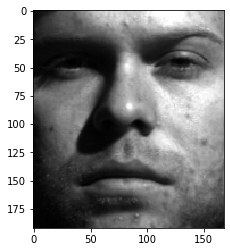

In [115]:
plt.imshow(face1[0], cmap="gray")

In [68]:
X = np.hstack([face.reshape(-1,1) for face in face1[:-1] + face2[:-1]])
X.shape

(32256, 126)

In [69]:
mean = np.mean(X, axis=1).reshape(-1,1)
mean.shape

(32256, 1)

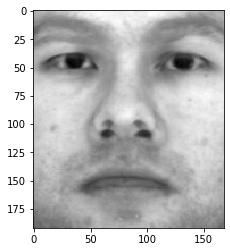

In [70]:
plt.imshow(mean.reshape(face1[0].shape), cmap="gray")

In [71]:
U, S, V = np.linalg.svd(X - mean, False)

In [72]:
U

array([[-1.52855097e-04, -9.32562553e-03,  1.60595385e-03, ...,
         8.54073254e-04, -2.70980743e-03,  1.59781071e-01],
       [-1.25621822e-04, -9.27188471e-03,  1.73254178e-03, ...,
         6.95592547e-04, -4.19604326e-03,  1.35114936e-01],
       [ 7.84827283e-05, -9.42336112e-03,  2.19961771e-03, ...,
        -7.92648516e-04, -5.65306736e-03, -6.80693860e-01],
       ...,
       [ 1.07004969e-03,  5.35155374e-03, -9.69885794e-03, ...,
        -3.82663533e-04,  3.78316296e-02, -1.48848558e-03],
       [ 8.75517962e-04,  5.63841316e-03, -9.30946492e-03, ...,
        -3.58117070e-04,  3.74531914e-02, -1.72597047e-03],
       [ 7.00396114e-04,  6.03124220e-03, -8.84247489e-03, ...,
         2.23577066e-03,  4.20377713e-02, -2.28657180e-04]])

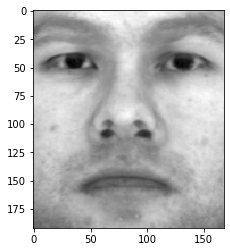

In [73]:
plt.imshow((U[:,0] + mean.flatten()).reshape(face1[0].shape) , cmap='gray')

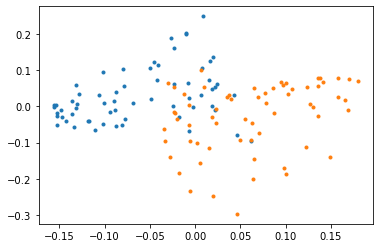

In [94]:
plt.plot(V[3,:63], V[9,:63], '.')
plt.plot(V[3,63:], V[9,63:], '.')

In [78]:
from sklearn.cluster import KMeans

In [91]:
cluster = KMeans(2).fit(V[(3,9),:].T)

In [92]:
pred = cluster.predict(V[(3,9),:].T)

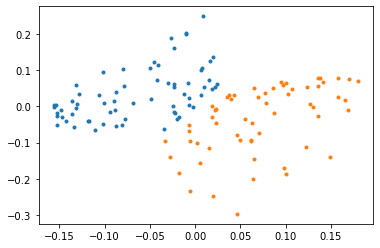

In [93]:
plt.plot(V[3, pred==0], V[9, pred==0], '.')
plt.plot(V[3, pred==1], V[9, pred==1], '.')

In [98]:
(U.T @ U)[:3,:3]

array([[ 1.00000000e+00,  1.13949648e-15, -4.16333634e-17],
       [ 1.13949648e-15,  1.00000000e+00,  5.03937170e-16],
       [-4.16333634e-17,  5.03937170e-16,  1.00000000e+00]])

In [99]:
X_test = np.hstack((face1[-1].reshape(-1, 1), face2[-1].reshape(-1, 1)))

In [101]:
X_test.shape

(32256, 2)

In [107]:
V_test = (np.linalg.inv(np.diag(S)) @ U.T @ X_test)
V_test

array([[ 2.71978273e-01,  3.58788687e-02],
       [-3.60760290e-03,  4.86158849e-02],
       [ 5.88642592e-02,  1.00771768e-02],
       [-9.52715894e-02,  5.10484672e-02],
       [-2.06013194e-01, -1.77858915e-01],
       [-2.94850659e-02, -9.35870433e-03],
       [-6.11473717e-02,  1.29819824e-02],
       [-4.67701909e-04,  1.92202955e-01],
       [ 6.37512847e-03, -3.57244031e-02],
       [-1.13564494e-01, -2.14966827e-01],
       [ 3.16659074e-02,  8.47454304e-03],
       [-2.57322198e-02, -5.95252018e-02],
       [ 1.12009170e-01,  2.11698932e-02],
       [-1.65784542e-01, -2.58917690e-01],
       [ 1.27843782e-01,  7.00332556e-03],
       [-5.81370403e-02, -2.66596111e-01],
       [-1.90940507e-01, -2.41230111e-01],
       [-1.88533457e-02, -9.49056763e-02],
       [ 1.33595514e-01,  8.92773912e-02],
       [-7.54862942e-02, -1.20013388e-02],
       [-1.38400801e-01, -2.04967669e-01],
       [-1.50165998e-01, -2.88029272e-01],
       [ 1.04339490e-02,  1.92179561e-01],
       [ 1.

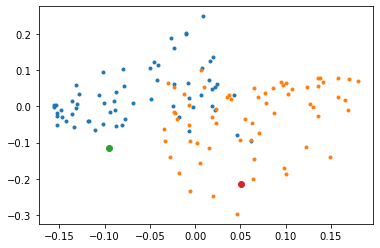

In [112]:
plt.plot(V[3,:63], V[9,:63], '.')
plt.plot(V[3,63:], V[9,63:], '.')
plt.plot(V_test[3,0], V_test[9,0], 'o')
plt.plot(V_test[3,1], V_test[9,1], 'o')

In [113]:
pred_test = cluster.predict(V_test[(3,9),:].T)
pred_test

array([0, 1], dtype=int32)

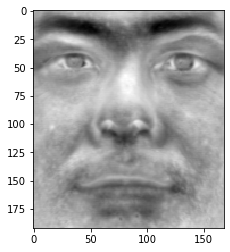

In [116]:
plt.imshow(U[:,3].reshape(face1[0].shape) , cmap='gray')

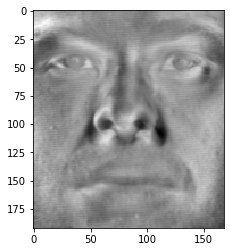

In [117]:
plt.imshow(U[:,9].reshape(face1[0].shape) , cmap='gray')